<a href="https://colab.research.google.com/github/haechis/DeepLearning_tutorial/blob/main/Do_it_DeepLearning_2_201218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do it Deep Learning 제 3장

머신러닝의 기초를 다집니다. 
- 수치 예측



1차 함수로 이해하는 선형 회귀


y = ax + b


a: 기울기 , b: 절편

@ 선형회귀는 기울기와 절편을 찾아준다!


x와 y가 주어졌을 때, a와 b를 찾는 것이 선형회귀


In [ ]:
# 사이킷런에서 당뇨병 환자 데이터 가져오기
# 사이킷런의 datasets 모듈에 있는 load_diabetes() 함수를 임포트, 매개변수 값을 넣지 않고 함수 호출 -> diabetes에 당뇨병 데이터 저장
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

#diabetes 변수에 저장된 값의 자료형은 파이썬의 dictionary와 유사한 Bunch 클래스이다.

In [ ]:
# 입력과 타깃 데이터의 크기 확인하기

# 샘플 데이터
print(diabetes.data.shape)

# 타깃 데이터 (1차원 배열/행벡터)
print(diabetes.target.shape)

(442, 10)
(442,)


In [ ]:
# 샘플 즉, 입력 데이터의 특성은 다른 말로 속성, 독립 변수, 설명 변수 등으로 부른다.
# diabetes.data의 행을 나타내는 것이다.

# 입력 데이터를 자세히 디다 보자.
# diabetes.data에 저장된 입력 데이터의 일부를 출력
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [ ]:
# 타깃 데이터 자세히 보기
diabetes.target[:3]

array([151.,  75., 141.])

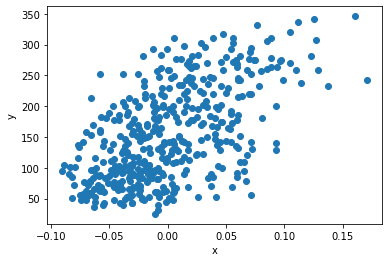

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 입력 데이터 중에서 3번째 요소가 정비례 관계에 있는 것을 확인하였다.
# 다음과 같이 저장해보자.
x = diabetes.data[:,2]
y = diabetes.target


# 경사하강법 Gradient Descent

모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘.

<훈련 데이터에 잘 맞는 w(기울기) b(절편)를 찾는 방법>
- 무작위로 w,b 설정
- x에서 샘플 하나를 선택하여 y_hat 계산(무작위로 모델 예측)
- y_hat과 선택한 샘플의 진짜 y를 비교
- y_hat과 y가 더 가까워지도록 w,b 조정
- 모든 샘플을 처리할 때까지 위 과정을 반복



In [ ]:
# w, b 초기화
w = 1.0
b = 1.0


In [ ]:
# 훈련 데이터의 첫 번째 샘플 데이터 사용
y_hat = x[0]*w + b
print(y_hat)

1.0616962065186886


In [ ]:
# 타깃과 예측 데이터 비교
print(y[0])


151.0


In [ ]:
# w 조정하여 예측값 바꾸기
# 먼저, 기울기 w를 조정해보자
w_inc = w + 0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705574


In [ ]:
# w 값 조정한 후 예측값 증가 정도 확인하기
# w가 0.1 증가했을 때 y_hat이 얼마나 증가했는지 계산해보자.
w_rate = (y_hat_inc-y_hat)/(w_inc-w) # 가중치 증가량 분의 예측치 증가량
print(w_rate)

0.061696206518688734


In [ ]:
# 위에 식들에서, 변화율을 수식으로 정리하면, 변화율은 결국 훈련 데이터의 첫 번째 샘플인 x[0]이다.


In [ ]:
# 변화율로 가중치 업데이트 하기
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [ ]:
# 변화율로 절편 업데이트하기
# 절편 b에 대한 변화율을 구한 다음 변화율로 b를 업데이트해보자.
# b를 0.1만큼 증가시킨 후 y_hat이 얼마나 증가했는지 계산하고 변화율도 계산해보자
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


In [ ]:
# 위를 보면, 증가율이 1이 된다. 
# 당연히, 절편이 1 증가하면 모든 y가 1씩 증가하는 거겠지
# 즉, b를 업데이트하기 위해서는 변화율이 1이므로 단순히 1을 더하면 된다.
b_new = b + 1
print(b_new)

2.0


여기까지,

y_hat을 증가시켜야 하는 상황을 가정하고 w와 b를 업데이트 해보았다.

- 그런데 w와 b를 더 큰 폭으로 수정해야한다면?

- y_hat이 y보다 커지면 y_hat을 감소시키지 못한다?

이후에는, w와 b를 좀 더 능동적으로 업데이트하는 방법인 오차 역전파에 대하여 알아보자

# 오차 역전파로 가중치와 절편을 더 적절하게 업데이트 한다.

오차 역전파(back propagation)는 y_hat과 y의 차이를 이용하여 w와 b를 업데이트한다.

이 방법은 오차가 연이어 전파되는 모습으로 수행된다.

여기서는, y에서 y_hat을 뺀 오차의 양을 변화율에 곱하는 방법으로 w를 업데이트 해보자. 이렇게 하면 y_hat이 y보다 많이 작은 경우 w와 b를 많이 바꿀 수 있겠다.

또, y_hat이 y를 지나치면 w와 b의 방향도 바꾼다.

In [ ]:
# 오차와 변화율을 곱하여 가중치 업데이트 하기!
# 먼저 x[0]일 때 w의 변화율과 b의 변화율에 오차를 곱한 다음 업데이트된 w_new와 b_new를 출력해보자.

err = y[0] - y_hat
w_new = w + w_rate*err
b_new = b + b_rate*err

print(w_new, b_new)

10.250624555904514 150.9383037934813


In [ ]:
# 두 번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구해보자. 
# 앞에서 w_rate 식을 정리했을 때 샘플값과 같아진다는 것을 알았으므로 앞으로는 w_rate를 별도로 계산하지 않고!
# 샘플값을 그대로 사용한다.
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat

w_rate = x[1]

w_new = w_new +w_rate*err
b_new = b_new + b_rate*err

print(w_new,b_new)

14.132317616381767 75.52764127612664


In [ ]:
# 이런식으로 전체샘플에 대하여 반복해보자

# zip() 함수는 여러 개의 배열에서 동시에 요소를 하나씩 꺼내준다.
w = 1.0
b = 1.0
for x_i, y_i in zip(x,y):
  y_hat = x_i*w+b
  w_rate = x_i
  
  err = y_i - y_hat

  w = w + w_rate * err
  b = b + 1 * err

print(w,b)

587.8654539985689 99.40935564531424


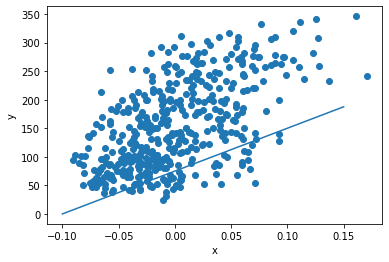

In [ ]:
# 위에서 구한 w,b를 이용하여 그래프를 그려보자
# 과연 잘 구한 것일까?!
plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)
pt2 = (0.15,0.15*w+b)

plt.plot([pt1[0],pt2[0]], [pt2[0],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 좀 더 개선하기 위하여 여러 에포크를 반복하자
# 보통 경사 하강법에서는 주어진 훈련 데이터로 학습을 여러 번 반복한다.
# 우선 100번 반복해보자

w = 1.0 
b = 1.0
for i in range(100):
  for x_i , y_i in zip(x,y):
      y_hat = w*x_i + b

      err = y_i - y_hat

      w_rate = x_i

      w = w + w_rate*err
      b = b + 1*err

print(w,b)


913.5973364345905 123.39414383177204


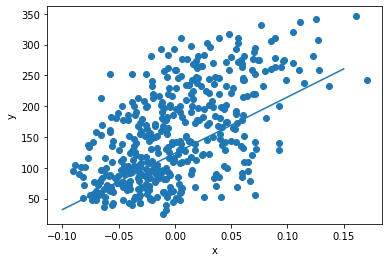

In [ ]:
# 100번 반복한것을 그려보자
plt.scatter(x,y)
pt1 = (-0.1,-0.1*w + b)
pt2 = (0.15,0.15*w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

이렇게 해서 찾은 모델

=> y_hat = 913.6x + 123.4



In [ ]:
# 만약에 입력 x에 없던 새로운 데이터가 발생했다고 가정해보자.
# 예측값을 얻으려면 어떻게 해야할까?
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643899983


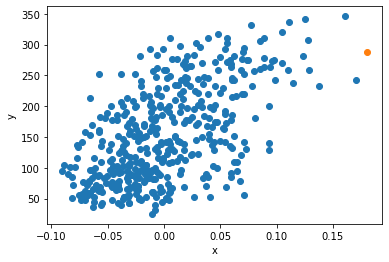

In [ ]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 03-3 손실 ㅎ마수와 경사 하강법의 관계

앞서 구현한 경사 하강법이 실제로 어떤 개념에 의해 사용되었는지 알아보자.

경사 하강법을 좀 더 기술적으로 표현하면 '어떤 손실 함수(loss function)'가 정의되었을 때 손실 함수의 값이 최소가 되는 지점을 찾아가는 바업이다. 

여기서 손실 함수란 말 그대로 예상한 값과 실제 타깃값의 차이를 함수로 정의한 것이다.

앞서 사용한 '오차를 변화율에 곱하여 가중치와 절편 업데이트'는 '제곱 오차'라는 손실 함수를 미분한 것과 같다.

<손실 함수>

제곱오차: 타깃값과 예측값 차이의 제곱

이때 제곱오차가 최소가 되면 산점도 그래프를 가장 잘 표현한 직선이 된다.

제곱 오차 함수의 최솟값을 알아내려면 기울기에 따라 함수의 값이 낮은 쪽으로 이동해야 한다. 기울기를 구하려면 제곱 오차를 가중치나 절편에 대해 미분하면 된다. 


<제곱 오차를 가중치와 절편에 대하여 미분>

SE = Squared Error

aSE/aw = -2(y-y_hat)*x 
 
보통, 

aSE/aw = -(y-y_hat)*x로 쓴다.

가중치 업데이트

x = x -aSE/aw = w + (y-y_hat)*x

이것은 앞서 봤던 w+w_rate*err와 같다!

<제곱 오차를 가중치와 절편에 대하여 미분 - 2>

aSE/ab = -(y-y_hat)*1

마찬가지로, 앞서 했던 b = b + 1 * err와 같다!



앞으로, 손실 함수에 대해 일일이 변화율의 값을 계산하는 대신 편미분을 사용하여 변화율을 계산한다. 그리고 변화율은 인공지능 분야에서 그레이디언트(gradient,경사)라고 한다! like 그레디언트가 전파된다. 그레디언트가 손실된다.



# 선형 회귀를 위한 뉴런을 만듭니다.

앞에서 만든 경사 하강법 알고리즘을 Neuron이라는 이름의 파이썬 클래스로 만들어보자! 즉, 뉴런을 만들어보자.


앞으로 배우게 될 알고리즘들은 이 클래스를 기반으로 확장하게 된다.


In [ ]:
# Neuron 클래스 만들기

# 먼저, Neuron 클래스의 전체 구조.

class Neuron:

  def __init__(self):
    # 초기화 작업을 수행한다.
    self.w = 1.0
    self.b = 1.0

  # 필요한 메서드를 추가

  ## 정방향 계산
  def forpass(self,x):
  # def forpass(self,x) -> 1차 함수를 통해 예측값을 계산
  # 가중치와 절편은 인스턴스 변수 w,b 사용
    y_hat = x*self.w + self.b
    return y_hat

  ## 역방향 계산
  def backprop(self, x, err):
    # y_hat과 y의 차이 -> 역방향 계산
    # 가중치 -> aSE/aw = -(y-y_hat)x
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  # 이제 Neuron 클래스를 이용하여 가중치와 절편을 업데이트 하는 fit() 메서드를 구현해보자
  # 이 메서드는 오차 역잔파를 학습하여 for문으로 구현했던 코드와 매우 유사하다.
  def fit(self, x, y, epochs = 100):
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err = -(y_i-y_hat)
        w_grad, b_grad = self.backprop(x_i,err)
        self.w -= w_grad
        self.b -= b_grad

In [ ]:
# 모델 훈련하기(학습시키기)
# 실제 모델을 만들고, 훈련해보기
neuron = Neuron( )
neuron.fit(x,y)


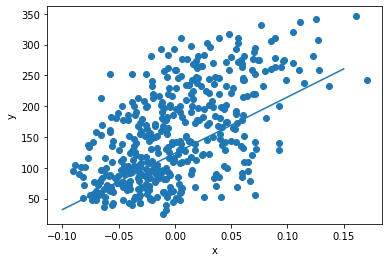

In [ ]:
# 학습 이후 모델의 가중치와 절편 확인하기
# neuron.w & neuron.b
plt.scatter(x,y)
pt1 = (-0.1, -0.1*neuron.w + neuron.b)
pt2 = (0.15, 0.15*neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()